# Introduction
<center>
<div class="alert alert-block alert-info">
<b>CRM(Customer Relationship Management) Analytics</b> </div></center>
<div style="width:100%;text-align: center;"> <img align=middle src="https://www.leadclic.com/uploads/d0c715bb-3b79-4fe8-9031-e5cdd20c861f/d0c715bb-3b79-4fe8-9031-e5cdd20c861f.png" alt="Heat beating" style="height:300px;margin-top:1rem;margin-bottom:1rem;"> </div>
<center>
<div class="alert alert-block alert-info">
<b>What are The CRM(Customer Relationship Management) Analytics?</b> </div></center>

   Analytical CRM is a subset of CRM in which a company collects data about its customer interactions, to increase customer satisfaction and customer retention rates. Analytical CRM is a behind-the-scenes process; the client is not aware of the capture and analysis of their actions and interactions with the company.<br>
   Companies may forecast consumer behavior and recommend goods to which they are more likely to respond better based on the information collected about customer behaviors, experiences, and the end effects of these experiences.<br>
   Analytical CRM is an essential part of managing customer relations. Analytical CRM accumulates and analyzes consumer data of various kinds, including:<br>
* Sales data: purchase and return history, brand preferences, etc.
* Financial data: payment and credit history, including payment type, credit scores, etc.
* Marketing data: customer response rates to marketing campaigns, customer satisfaction data, retention data, etc.

<center>
<div class="alert alert-block alert-info">
<b>About The Project process</b> </div></center>

Hello, I am going to realise a project about CRM analytics. The Steps of this project, Firstly, I am going to make changes to the dataset to apply the RFM and CLTV models. After I prepared the dataset, I am going to work on RFM and then work on CLTV.

# Content <a id = "cont"></a>
- [EDA](#1)
- [Prepare the Dataset](#2)
    - [Fix null values and negative values](#2a)
    - [Total Prize](#2b)
- [RFM](#3)
    - [Prepare The DataSet For RFM](#3a)
    - [Segmentation](#3b)
    - [Review The RFM DataFrame](#3c)
- [CLTV](#4)
    - [Calculating and subtracting outlier values from the data](#4a)
    - [Prepare CLTV DataFrame](#4b)
    - [BG-NBD](#4c)
    - [Gamma Gamma](#4d)
    - [Segmentation](#4e)
    - [Review The CLTV DataFrame](#4f)
- [Conclusion](#5)

In [1]:
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00


In [2]:
# Libraries I will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: '%.3f' % x)

In [3]:
# Read Dataset
data_ = pd.read_csv("/content/online_retail_II.csv")
data = data_.copy()

# EDA <a id = "1"> </a>

In [4]:
# First view to the dataset
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00  6.950    13085.000  United Kingdom  
1  2009-12-01 07:45:00  6.750    13085.000  United Kingdom  
2  2009-12-01 07:45:00  6.750    13085.000  United Kingdom  
3  2009-12-01 07:45:00  2.100    13085.000  United Kingdom  
4  2009-12-01 07:45:00  1.250    13085.000  United Kingdom

In [5]:
data.tail()

Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                          POSTAGE         1   

                 InvoiceDate  Price  Customer ID Country  
1067366  2011-12-09 12:50:00  2.100    12680.000  France  
1067367  2011-12-09 12:50:00  4.150    12680.000  France  
1067368  2011-12-09 12:50:00  4.150    12680.000  France  
1067369  2011-12-09 12:50:00  4.950    12680.000  France  
1067370  2011-12-09 12:50:00 18.000    12680.000  France

In [6]:
data.shape

(1067371, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [8]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [9]:
data.describe()

Quantity       Price  Customer ID
count 1067371.000 1067371.000   824364.000
mean        9.939       4.649    15324.639
std       172.706     123.553     1697.464
min    -80995.000  -53594.360    12346.000
25%         1.000       1.250    13975.000
50%         3.000       2.100    15255.000
75%        10.000       4.150    16797.000
max     80995.000   38970.000    18287.000

In [10]:
data.isnull()

When we take a look at the overall dataset, there are 'Invoice', 'Quantity', 'InvoiceDate', 'Price' and 'Customer ID' columns that we can use in the dataset. I am going to apply both RFM and CLTV formulas on this data set using these columns.

In [11]:
# Number of Customer in the dataset.
print("The number of customer in the dataset:", data["Customer ID"].nunique())

The number of customer in the dataset: 5942


In [12]:
# Number of Invoice in the dataset.
print("The number of invoice in the dataset:", data["Invoice"].nunique())

The number of invoice in the dataset: 53628


In [13]:
# Total number of products sold in the dataset
print("The sum of product in the dataset:", data["Quantity"].sum())

The sum of product in the dataset: 10608492


In [14]:
# Total revenue in the dataset
total_price_of_df = ((data["Quantity"] * data["Price"]).sum()).astype(int)
print("The sum of price in the dataset:", total_price_of_df)

The sum of price in the dataset: 19287250


In [15]:
# Total number of product in the dataset.
print("the sum of product in the dataset:", data["Description"].count())

the sum of product in the dataset: 1062989


In [16]:
# Dataset ordered from highest price to lowest price
data.sort_values(by = "Price", ascending  = False).head()

Invoice     StockCode   Description  Quantity          InvoiceDate  \
748142   C556445             M        Manual        -1  2011-06-10 15:31:00   
241827    512771             M        Manual         1  2010-06-17 16:53:00   
241824   C512770             M        Manual        -1  2010-06-17 16:52:00   
320581   C520667  BANK CHARGES  Bank Charges        -1  2010-08-27 13:42:00   
1050063  C580605     AMAZONFEE    AMAZON FEE        -1  2011-12-05 11:36:00   

            Price  Customer ID         Country  
748142  38970.000    15098.000  United Kingdom  
241827  25111.090          NaN  United Kingdom  
241824  25111.090    17399.000  United Kingdom  
320581  18910.690          NaN  United Kingdom  
1050063 17836.460          NaN  United Kingdom

There are negative values in the column of Quantity and nan values in the column of Customer ID. I will clear them.

In [17]:
# Dataset ordered from lowest price to highest price
data.sort_values(by = "Price", ascending  = True).head()

Invoice StockCode      Description  Quantity          InvoiceDate  \
179403  A506401         B  Adjust bad debt         1  2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1  2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1  2010-10-20 12:04:00   
825444  A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
825445  A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

            Price  Customer ID         Country  
179403 -53594.360          NaN  United Kingdom  
276274 -44031.790          NaN  United Kingdom  
403472 -38925.870          NaN  United Kingdom  
825444 -11062.060          NaN  United Kingdom  
825445 -11062.060          NaN  United Kingdom

There are negative values in the column of Price. I will clear them.

I created a function not to rewrite the above operations one by one.

In [18]:
# The number of customers in the dataset
print("The number of customers in the dataset:", data["Customer ID"].nunique())

The number of customers in the dataset: 5942


In [20]:
# The number of invoices in the dataset
print("The number of invoices in the dataset:", data["Invoice"].nunique())

The number of invoices in the dataset: 53628


In [19]:
# The total stock of products sold in the dataset
print("The total stock of products sold in the dataset:", data["Quantity"].sum())

The total stock of products sold in the dataset: 10608492


In [21]:
# The total revenue in the dataset
total_price_of_df = ((data["Quantity"] * data["Price"]).sum()).astype(int)
print("The total revenue in the dataset:", total_price_of_df)

The total revenue in the dataset: 19287250


In [22]:
# The total number of product types in the dataset
print("The total number of product types in the dataset:", data["Description"].count())

The total number of product types in the dataset: 1062989


In [23]:
# Our dataset sorted by highest price
print("Our dataset, sorted by highest price")
print(data.sort_values(by = "Price", ascending = False).head())

Our dataset, sorted by highest price
         Invoice     StockCode   Description  Quantity          InvoiceDate  \
748142   C556445             M        Manual        -1  2011-06-10 15:31:00   
241827    512771             M        Manual         1  2010-06-17 16:53:00   
241824   C512770             M        Manual        -1  2010-06-17 16:52:00   
320581   C520667  BANK CHARGES  Bank Charges        -1  2010-08-27 13:42:00   
1050063  C580605     AMAZONFEE    AMAZON FEE        -1  2011-12-05 11:36:00   

            Price  Customer ID         Country  
748142  38970.000    15098.000  United Kingdom  
241827  25111.090          NaN  United Kingdom  
241824  25111.090    17399.000  United Kingdom  
320581  18910.690          NaN  United Kingdom  
1050063 17836.460          NaN  United Kingdom  


In [24]:
# Our dataset sorted by lowest price
print("Our dataset, sorted by lowest price")
print(data.sort_values(by = "Price", ascending = True).head())

Our dataset, sorted by lowest price
        Invoice StockCode      Description  Quantity          InvoiceDate  \
179403  A506401         B  Adjust bad debt         1  2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1  2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1  2010-10-20 12:04:00   
825444  A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
825445  A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

            Price  Customer ID         Country  
179403 -53594.360          NaN  United Kingdom  
276274 -44031.790          NaN  United Kingdom  
403472 -38925.870          NaN  United Kingdom  
825444 -11062.060          NaN  United Kingdom  
825445 -11062.060          NaN  United Kingdom  


# Prepare the Dataset <a id = "2"></a>
In this chapter, I'm going to prepare the dataset for RFM and cltv. I saw some wrong values while I review the dataset. I am going to clear them and I am going to change the type of the "InvoiceDate" column to DateTime type.

In [25]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00  6.950    13085.000  United Kingdom  
1  2009-12-01 07:45:00  6.750    13085.000  United Kingdom  
2  2009-12-01 07:45:00  6.750    13085.000  United Kingdom  
3  2009-12-01 07:45:00  2.100    13085.000  United Kingdom  
4  2009-12-01 07:45:00  1.250    13085.000  United Kingdom

In [26]:
# Changing the type of the 'InvoiceDate' column
data["InvoiceDate"] = data["InvoiceDate"].apply(pd.to_datetime)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


As you can see, we changed the data type of the IncoiceDate column to DateTime.

## Fix null values and negative values <a id = "2a"></a>

In [28]:
# Dropping the null values in the dataset.
data.dropna(inplace = True)

In [29]:
# The state of the dataset after clearing the null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


When I see the chapter on shape, I see deleted some values and When Check the chapter on NA, I see There are not null values. But I still have a problem, I see There is a negative value in the Quartiles chapter. I must get rid of it.

The reason why we still have negative values in the Quantity section is invoices that start with C at the beginning because these invoices are return invoices. Show to you the values:

In [30]:
# Values starting with 'C'
data[data["Invoice"].str.contains("C", na = False)].head()

Invoice StockCode                    Description  Quantity  \
178  C489449     22087       PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896             POTTING SHED TWINE        -6   
182  C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   

            InvoiceDate  Price  Customer ID    Country  
178 2009-12-01 10:33:00  2.950    16321.000  Australia  
179 2009-12-01 10:33:00  1.650    16321.000  Australia  
180 2009-12-01 10:33:00  4.250    16321.000  Australia  
181 2009-12-01 10:33:00  2.100    16321.000  Australia  
182 2009-12-01 10:33:00  2.950    16321.000  Australia

I have to take out the values starting with 'C'

In [31]:
# In this code, I am getting values not starting with 'C'.
data = data[~data["Invoice"].str.contains("C", na = False)]

We're looking and we don't have any negative values anymore.

In [32]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00  6.950    13085.000  United Kingdom  
1 2009-12-01 07:45:00  6.750    13085.000  United Kingdom  
2 2009-12-01 07:45:00  6.750    13085.000  United Kingdom  
3 2009-12-01 07:45:00  2.100    13085.000  United Kingdom  
4 2009-12-01 07:45:00  1.250    13085.000  United Kingdom

It is the state of the dataset now. In this chapter, I dropped the null values, took out the negative values, and changed the type in this dataset.

In [33]:
data = data[data["Quantity"] > 0]
data = data[data["Price"] > 0]

## Total Prize <a id = "2b"></a>
In this chapter, I am going to calculate the total price and then add it to the dataset.

In [34]:
# Calculating total price and adding it.
data["Total_Prize"] = data["Quantity"] * data["Price"]

In [35]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total_Prize  
0 2009-12-01 07:45:00  6.950    13085.000  United Kingdom       83.400  
1 2009-12-01 07:45:00  6.750    13085.000  United Kingdom       81.000  
2 2009-12-01 07:45:00  6.750    13085.000  United Kingdom       81.000  
3 2009-12-01 07:45:00  2.100    13085.000  United Kingdom      100.800  
4 2009-12-01 07:45:00  1.250    13085.000  United Kingdom       30.000

Nice now we have a result in the dataset that shows how much each invoice costs in total. 😊

Now let's go back to our data analysis part, we will do some of the things I did before in this part!

In [36]:
data.info

# RFM <a id = "3"></a>
<center>
<div class="alert alert-block alert-info">
<b>What is the What Is Recency, Frequency, Monetary Value (RFM)?</b> </div></center>

<div style="width:100%;text-align: center;"> <img align=middle src="https://camo.githubusercontent.com/a144d0cfd2c98ff1025197cb623bae64bfe3b188c0817afffa9a521a73df096a/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f393331322f312a61514c4f646175352d4a7634714753315233416941412e706e67" alt="Heat beating" style="height:300px;margin-top:1rem;margin-bottom:1rem;"> </div>
Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company’s consumer base by their purchasing patterns or habits. In particular, it evaluates customers’ recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend).<br>
RFM is then used to identify a company’s or an organization’s best customers by measuring and analyzing spending habits to improve low-scoring customers and maintain high-scoring ones.

**Understanding Recency, Frequency, Monetary Value**<br>
The RFM model is based on three quantitative factors:<br>
1. Recency: How recently a customer has made a purchase
2. Frequency: How often a customer makes a purchase
3. Monetary value: How much money a customer spends on purchases

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The “best” customer would receive a top score in every category.

These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.

<center>
<div class="alert alert-block alert-info">
<b>About The Process Of This Section</b> </div></center>

In this section, I am going to prepare the dataset for RFM and segment the dataset I prepared.

## Prepare The DataSet For RFM <a id = "3a"></a>
In this chapter, I create recency, frequency, and monetary values.

In [37]:
# It is the last date in the dataset. I will need this to calculate the recency values. I'm going to use this to specify the today_date value.
data["InvoiceDate"].max()

In [38]:
# I specify this value to calculate recency values.
today_date = dt.datetime(2011,12,11)

In [39]:
# I create rfm dataframe.
df_rfm = data.groupby("Customer ID").agg({"InvoiceDate" : lambda InvoiceDate: (today_date - InvoiceDate.max()).days, # Recency
                                "Invoice" : lambda Invoice : Invoice.nunique(), # Frequency
                                "Total_Prize" : lambda Total_Prize: Total_Prize.sum()}) # Monetary

In [40]:
# The initial version of the df_rfm dataset.
df_rfm.head()

InvoiceDate  Invoice  Total_Prize
Customer ID                                   
12346.000            326       12    77556.460
12347.000              3        8     5633.320
12348.000             76        5     2019.400
12349.000             19        4     4428.690
12350.000            311        1      334.400

In [41]:
# Change the column name.
df_rfm.columns = ["Recency", "Frequency", "Monetary"]
df_rfm.head()

Recency  Frequency  Monetary
Customer ID                              
12346.000        326         12 77556.460
12347.000          3          8  5633.320
12348.000         76          5  2019.400
12349.000         19          4  4428.690
12350.000        311          1   334.400

In [42]:
df_rfm

Recency  Frequency   Monetary
Customer ID                               
12346.000        326         12  77556.460
12347.000          3          8   5633.320
12348.000         76          5   2019.400
12349.000         19          4   4428.690
12350.000        311          1    334.400
12351.000        376          1    300.930
12352.000         37         10   2849.840
12353.000        205          2    406.760
12354.000        233          1   1079.400
12355.000        215          2    947.610
12356.000         23          6   6373.680
12357.000         34          3  18287.660
12358.000          2          5   3887.070
12359.000         58         10   8935.940
12360.000         53          8   4252.890
12361.000        288          4    511.250
12362.000          4         11   5356.230
12363.000        110          2    552.000
12364.000          8          4   1313.100
12365.000        292          2    641.380
12366.000        634          1    500.240
12367.000          5          1    168.900
12368.000        629          1    917.700
12369.000        414          3   1791.150
12370.000         52          7   4320.310
12371.000         45          5   4067.380
12372.000         72          3   1298.040
12373.000        312          3   1127.650
12374.000         26          4   2989.220
12375.000         11          2    457.500
12376.000        390          2    503.150
12377.000        316          4   3426.320
12378.000        130          2   5416.320
12379.000         82          4   1620.220
12380.000         22         11   9676.300
12381.000          5          5   1845.310
12383.000        185          5   1850.560
12384.000         29          2    585.270
12385.000        380          1   1938.400
12386.000        338          2    660.800
12387.000        416          1    143.940
12388.000         16          8   3901.110
12389.000        403          3   1433.330
12390.000         80          1    549.840
12391.000         22          6   2773.420
12392.000        592          1    234.750
12393.000         73          6   2399.450
12394.000         64          2   1272.480
12395.000         20         15   5067.270
12396.000        675          1    931.430
12397.000         36          2   2409.900
12398.000         46          1   1635.660
12399.000        120          7   1962.300
12400.000        415          1    205.250
12401.000        304          1     84.300
12402.000        324          6   1256.900
12403.000         50          2   1019.360
12404.000        683          1     63.240
12405.000        149          1   1710.390
12406.000         23          5   6390.360
12407.000         50          5   1708.120
12408.000         33          8   4340.770
12409.000         79          7  23419.290
12410.000        309          3   1013.710
12411.000        410          1    346.900
12412.000         75          6   2596.930
12413.000         67          4    999.450
12414.000        218          6    952.410
12415.000         25         28 144458.370
12416.000        657          1    202.560
12417.000          4         20   6816.910
12418.000        113          4   2021.200
12419.000        386          2    503.010
12420.000         64          1    600.390
12421.000         16          6   1098.600
12422.000         96         17   5231.800
12423.000          1         10   2622.390
12424.000        163          4   3340.030
12425.000         79          2   1741.410
12426.000        195          2   1345.210
12427.000         22          3   1129.300
12428.000         26          9   7956.460
12429.000         10          8   7485.910
12430.000         44          1    256.400
12431.000         36         27  10857.970
12432.000         43          5   5059.320
12433.000          1         10  20581.260
12434.000         85          3   1103.430
12435.000         80          6  13925.930
12436.000        100          1    509.010
12437.000          2         39  12683.400
12438.000     

In [43]:
# The first five values with the highest monetary value
df_rfm.sort_values(by = "Monetary", ascending = False).head()

Recency  Frequency   Monetary
Customer ID                               
18102.000          1        145 608821.650
14646.000          2        151 528602.520
14156.000         10        156 313946.370
14911.000          2        398 295972.630
17450.000          9         51 246973.090

In [44]:
# The first five values with the lowest monetary value
df_rfm.sort_values(by = "Monetary", ascending = True).head()

Recency  Frequency  Monetary
Customer ID                              
14095.000        723          1     2.950
16738.000        298          1     3.750
13788.000        506          1     3.750
14792.000         64          1     6.200
15913.000        535          1     6.300

## Segmentation <a id="3b"></a>
In this chapter, I am going to split from recency, frequency, and monetary values to Recency_Score, frequency_score, and monetary_score.

**Recency_Score, Frequency_Score, Monetary_Score**<br>
I rate the recency, frequency, and monetary scores between 5 and 1. In this section, data with a score of 5 will be the data with the best recency score for us, data with a score of 1 will have the worst score.

**Recency_Score:**
You know, high recency values are bad for us. Because high recency values represent the day the customer stays away from the company. Customers with low recency values are customers who do not stay away from the company.

**Frequency_Score:**
High-frequency values are good for us. The Frequency value is that customer use how many use our company more.

**Monetary_Score:**
High-monetary values are good for us. The Monetary value is the customer how much pays the company.

In [45]:
# Create the recency_score, frequency_score, and monetary_score values.
df_rfm["Recency_Score"] = pd.qcut(df_rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])
df_rfm["Frequency_Score"] = pd.qcut(df_rfm["Frequency"].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
df_rfm["Monetary_Score"] = pd.qcut(df_rfm["Monetary"], 5, labels = [1, 2, 3, 4, 5])

In [46]:
# Last version of df_rfm dataframe.
df_rfm.head()

Recency  Frequency  Monetary Recency_Score Frequency_Score  \
Customer ID                                                               
12346.000        326         12 77556.460             2               5   
12347.000          3          8  5633.320             5               4   
12348.000         76          5  2019.400             3               4   
12349.000         19          4  4428.690             5               3   
12350.000        311          1   334.400             2               1   

            Monetary_Score  
Customer ID                 
12346.000                5  
12347.000                5  
12348.000                4  
12349.000                5  
12350.000                2

In [47]:
# I create the RF_score using the recency_score and frequency_score.
df_rfm["RF_Score"] = df_rfm["Recency_Score"].astype(str) + df_rfm["Frequency_Score"].astype(str)

In [48]:
# Last version of df_rfm dataframe.
df_rfm.head()

Recency  Frequency  Monetary Recency_Score Frequency_Score  \
Customer ID                                                               
12346.000        326         12 77556.460             2               5   
12347.000          3          8  5633.320             5               4   
12348.000         76          5  2019.400             3               4   
12349.000         19          4  4428.690             5               3   
12350.000        311          1   334.400             2               1   

            Monetary_Score RF_Score  
Customer ID                          
12346.000                5       25  
12347.000                5       54  
12348.000                4       34  
12349.000                5       53  
12350.000                2       21

In [49]:
# Seg_map is customer group.
seg_map = {
    r'[1-2][1-2]' : 'hibernatig',
    r'[1-2][3-4]' : 'at_Risk',
    r'[1-2]5' : 'cant-loose',
    r'3[1-2]' : 'about_to_sleep',
    r'33' : 'need_attention',
    r'[3-4][4-5]' : 'loyal_customers',
    r'41' : 'promising',
    r'51' : 'new_customers',
    r'[4-5][2-3]' : 'potential_loyalists',
    r'5[4-5]' : 'champions'}

In [50]:
# I create segment using RF_Score and segmap.
df_rfm["segment"] = df_rfm["RF_Score"].replace(seg_map, regex = True)

In [51]:
# Last version of df_rfm dataframe.
df_rfm.head()

Recency  Frequency  Monetary Recency_Score Frequency_Score  \
Customer ID                                                               
12346.000        326         12 77556.460             2               5   
12347.000          3          8  5633.320             5               4   
12348.000         76          5  2019.400             3               4   
12349.000         19          4  4428.690             5               3   
12350.000        311          1   334.400             2               1   

            Monetary_Score RF_Score              segment  
Customer ID                                               
12346.000                5       25           cant-loose  
12347.000                5       54            champions  
12348.000                4       34      loyal_customers  
12349.000                5       53  potential_loyalists  
12350.000                2       21           hibernatig

## Review The RFM DataFrame <a id= "3c"></a>
In this chapter, I am going to review the df_rfm dataframe.

In the code block below, it sends us the mean, total and count of the segment values at recency, frequency and monetary values.

In [52]:
df_rfm[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "sum", "count"])

Recency               Frequency               Monetary  \
                       mean     sum count      mean    sum count      mean   
segment                                                                      
about_to_sleep      107.619   41756   388     1.361    528   388   531.970   
at_Risk             373.943  280457   750     3.904   2928   750  1383.596   
cant-loose          331.803   23558    71    15.930   1131    71  8355.678   
champions             9.250    7881   852    19.215  16371   852 10795.521   
hibernatig          460.012  700139  1522     1.252   1906  1522   437.963   
loyal_customers      68.306   78347  1147     9.803  11244  1147  4199.729   
need_attention      114.242   30731   269     3.156    849   269  1283.114   
new_customers        11.304     633    56     1.000     56    56   356.258   
potential_loyalists  26.297   18750   713     2.589   1846   713  1155.427   
promising            39.282    4321   110     1.000    110   110   324.497   

                                       
                            sum count  
segment                                
about_to_sleep       206404.323   388  
at_Risk             1037697.190   750  
cant-loose           593253.112    71  
champions           9197783.535   852  
hibernatig           666579.892  1522  
loyal_customers     4817088.695  1147  
need_attention       345157.670   269  
new_customers         19950.440    56  
potential_loyalists  823819.651   713  
promising             35694.670   110

The code block below sends us the best and worst recency, frequency, and monetary values according to the RF_Score we entered.

In [53]:
def check_RF_Score(rfScore):
    print(f"############ Top five Recency - {rfScore} ############")
    print(df_rfm[df_rfm["RF_Score"] == rfScore].sort_values(by = "Recency", ascending = True).head())
    print(f"############ Bottom five Recency - {rfScore} ############")
    print(df_rfm[df_rfm["RF_Score"] == rfScore].sort_values(by = "Recency", ascending = False).head())

    print(f"############ Top five Frequency - {rfScore} ############")
    print(df_rfm[df_rfm["RF_Score"] == rfScore].sort_values(by = "Frequency", ascending = False).head())
    print(f"############ Bottom five Frequency - {rfScore} ############")
    print(df_rfm[df_rfm["RF_Score"] == rfScore].sort_values(by = "Frequency", ascending = True).head())

    print(f"############ Top five Monetary - {rfScore} ############")
    print(df_rfm[df_rfm["RF_Score"] == rfScore].sort_values(by = "Monetary", ascending = False).head())
    print(f"############ Bottom five Monetary - {rfScore} ############")
    print(df_rfm[df_rfm["RF_Score"] == rfScore].sort_values(by = "Monetary", ascending = True).head())

In [54]:
check_RF_Score("55")

############ Top five Recency - 55 ############
             Recency  Frequency   Monetary Recency_Score Frequency_Score  \
Customer ID                                                                
13426.000          1         22   8167.380             5               5   
12662.000          1         20   6988.020             5               5   
15311.000          1        208 116771.160             5               5   
16558.000          1         38  13873.510             5               5   
17001.000          1         19   6640.800             5               5   

            Monetary_Score RF_Score    segment  
Customer ID                                     
13426.000                5       55  champions  
12662.000                5       55  champions  
15311.000                5       55  champions  
16558.000                5       55  champions  
17001.000                5       55  champions  
############ Bottom five Recency - 55 ############
             Recency  Fre

It sends us the best and worst column data from the df_rfm dataframe according to the column variable we will enter in the code block below.

In [55]:
def check_rfm_best_and_worst(column):
    if (column == "Recency"):
        print(f"############ Top five - {column} ############")
        print(df_rfm.sort_values(by = column, ascending = True).head())
        print(f"############ Bottom five - {column} ############")
        print(df_rfm.sort_values(by = column, ascending = False).head())
    else:
        print(f"############ Top five - {column} ############")
        print(df_rfm.sort_values(by = column, ascending = False).head())
        print(f"############ Bottom five - {column} ############")
        print(df_rfm.sort_values(by = column, ascending = True).head())

In [56]:
check_rfm_best_and_worst("Recency")

############ Top five - Recency ############
             Recency  Frequency  Monetary Recency_Score Frequency_Score  \
Customer ID                                                               
12433.000          1         10 20581.260             5               5   
14051.000          1         37 22434.000             5               5   
17581.000          1         43 18757.750             5               5   
13069.000          1         38  9683.130             5               5   
16558.000          1         38 13873.510             5               5   

            Monetary_Score RF_Score    segment  
Customer ID                                     
12433.000                5       55  champions  
14051.000                5       55  champions  
17581.000                5       55  champions  
13069.000                5       55  champions  
16558.000                5       55  champions  
############ Bottom five - Recency ############
             Recency  Frequency  Monet

In [57]:
check_rfm_best_and_worst("Frequency")

############ Top five - Frequency ############
             Recency  Frequency   Monetary Recency_Score Frequency_Score  \
Customer ID                                                                
14911.000          2        398 295972.630             5               5   
12748.000          1        336  56599.390             5               5   
17841.000          2        211  70884.070             5               5   
15311.000          1        208 116771.160             5               5   
13089.000          3        203 116737.860             5               5   

            Monetary_Score RF_Score    segment  
Customer ID                                     
14911.000                5       55  champions  
12748.000                5       55  champions  
17841.000                5       55  champions  
15311.000                5       55  champions  
13089.000                5       55  champions  
############ Bottom five - Frequency ############
             Recency  Frequ

In [58]:
check_rfm_best_and_worst("Monetary")

############ Top five - Monetary ############
             Recency  Frequency   Monetary Recency_Score Frequency_Score  \
Customer ID                                                                
18102.000          1        145 608821.650             5               5   
14646.000          2        151 528602.520             5               5   
14156.000         10        156 313946.370             5               5   
14911.000          2        398 295972.630             5               5   
17450.000          9         51 246973.090             5               5   

            Monetary_Score RF_Score    segment  
Customer ID                                     
18102.000                5       55  champions  
14646.000                5       55  champions  
14156.000                5       55  champions  
14911.000                5       55  champions  
17450.000                5       55  champions  
############ Bottom five - Monetary ############
             Recency  Frequen

The code block below gives us the best and worst values from the df_rfm dataframe according to the segment value we will enter. At the same time, gives the mean, total and count of the segment values at recency, frequency and monetary values.

In [59]:
def check_rfm_seg(segment):
    print(f"############ Top five - {segment} ############")
    print(df_rfm[df_rfm["segment"] == segment].sort_values(by = "segment", ascending = False).head())
    print(f"############ Bottom five - {segment} ############")
    print(df_rfm[df_rfm["segment"] == segment].sort_values(by = "segment", ascending = True).head())
    print(f"############ Quantiles with {segment} ############")
    print(df_rfm[df_rfm["segment"] == segment][["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["count", "mean", "sum"]))

In [60]:
check_rfm_seg("hibernatig")

############ Top five - hibernatig ############
             Recency  Frequency  Monetary Recency_Score Frequency_Score  \
Customer ID                                                               
12350.000        311          1   334.400             2               1   
16046.000        563          1   235.780             1               1   
16069.000        418          1   457.700             1               1   
16068.000        594          1   122.930             1               1   
16064.000        726          1   111.000             1               1   

            Monetary_Score RF_Score     segment  
Customer ID                                      
12350.000                2       21  hibernatig  
16046.000                1       11  hibernatig  
16069.000                2       11  hibernatig  
16068.000                1       11  hibernatig  
16064.000                1       11  hibernatig  
############ Bottom five - hibernatig ############
             Recency  Fre

In [61]:
check_rfm_seg("champions")

############ Top five - champions ############
             Recency  Frequency  Monetary Recency_Score Frequency_Score  \
Customer ID                                                               
12347.000          3          8  5633.320             5               4   
16393.000          3         23  5561.660             5               5   
16407.000         13         14  2821.650             5               5   
16411.000         20          4   910.190             5               4   
16422.000         18        109 63651.470             5               5   

            Monetary_Score RF_Score    segment  
Customer ID                                     
12347.000                5       54  champions  
16393.000                5       55  champions  
16407.000                4       55  champions  
16411.000                3       54  champions  
16422.000                5       55  champions  
############ Bottom five - champions ############
             Recency  Frequency  M

In [62]:
# In this code, I create copy to df_rfm because I am going to use it for visualization.
df_rfmv2 = df_rfm.copy()
df_rfmv2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          5878 non-null   int64   
 1   Frequency        5878 non-null   int64   
 2   Monetary         5878 non-null   float64 
 3   Recency_Score    5878 non-null   category
 4   Frequency_Score  5878 non-null   category
 5   Monetary_Score   5878 non-null   category
 6   RF_Score         5878 non-null   object  
 7   segment          5878 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 293.4+ KB


In [63]:
# I change the types of recency_score, frequency_score, and monetary_score to the integer type.
df_rfmv2["Recency_Score"] = df_rfmv2["Recency_Score"].astype(int)
df_rfmv2["Frequency_Score"] = df_rfmv2["Frequency_Score"].astype(int)
df_rfmv2["Monetary_Score"] = df_rfmv2["Monetary_Score"].astype(int)
df_rfmv2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          5878 non-null   int64  
 1   Frequency        5878 non-null   int64  
 2   Monetary         5878 non-null   float64
 3   Recency_Score    5878 non-null   int64  
 4   Frequency_Score  5878 non-null   int64  
 5   Monetary_Score   5878 non-null   int64  
 6   RF_Score         5878 non-null   object 
 7   segment          5878 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 413.3+ KB


<div style="width:100%;text-align: center;"> <img align=middle src="https://miro.medium.com/max/1288/1*TjJt4rUiBtXLAF84--V-Cg.png" alt="Heat beating" style="height:300px;margin-top:1rem;margin-bottom:1rem;"> </div>
<center>This picture is created using recency_score and frequency_score.</center>

In [64]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [65]:
import plotly.express as px
fig = px.scatter(df_rfmv2, x = "Recency_Score", y = "Frequency_Score", color = "segment", size = 'Monetary_Score', hover_data=['Monetary_Score'])
iplot(fig)

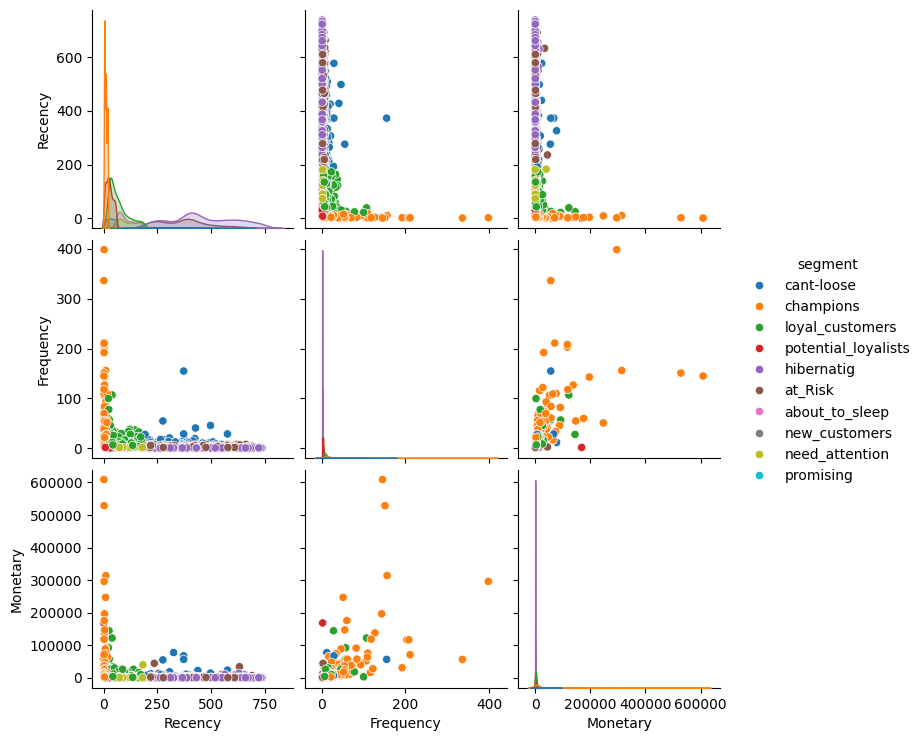

In [66]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(df_rfm, hue = "segment")

# CLTV <a id = "4"></a>
<center>
<div class="alert alert-block alert-info">
<b>What is the CLTV(Customer lifetime value)?</b> </div></center>

<div style="width:100%;text-align: center;"> <img align=middle src="https://www.namogoo.com/wp-content/uploads/2021/08/featured-1.jpg" alt="Heat beating" style="height:300px;margin-top:1rem;margin-bottom:1rem;"> </div>
Customer Lifetime Value (CLTV) is a prediction of the net profit attributed to the entire future relationship with a customer. It estimates the total value a business will derive from a customer relationship, taking into account the revenue, costs, and customer behavior patterns over a defined period of time. CLTV helps businesses understand the value of customer acquisition and retention, and guide decisions about investment in customer relationship management initiatives.

<center>
<div class="alert alert-block alert-info">
<b>About The Process Of This Section</b> </div></center>

In this chapter, I am going to some changes to the dataset. Then I am going to create df_cltv and then apply the two models. They are BetaGeoFitter and GammaGammaFitter models. I am going to use the BetaGeoFilter model to predict how often shop of customer. I am going to use the GammaGammaFilter model to predict how much profit a customer will bring. And then I am going to analyze the data.

In [67]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total_Prize  
0 2009-12-01 07:45:00  6.950    13085.000  United Kingdom       83.400  
1 2009-12-01 07:45:00  6.750    13085.000  United Kingdom       81.000  
2 2009-12-01 07:45:00  6.750    13085.000  United Kingdom       81.000  
3 2009-12-01 07:45:00  2.100    13085.000  United Kingdom      100.800  
4 2009-12-01 07:45:00  1.250    13085.000  United Kingdom       30.000

## Calculating and subtracting outlier values from the data <a id = "4a"></a>
In this chapter, I am going to calculate and subtract outlier values from the data

At the code blocks below, I am going to calculate the outlier with outlier_thresholds and then subtract it with replace_with_threshold.

In [68]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

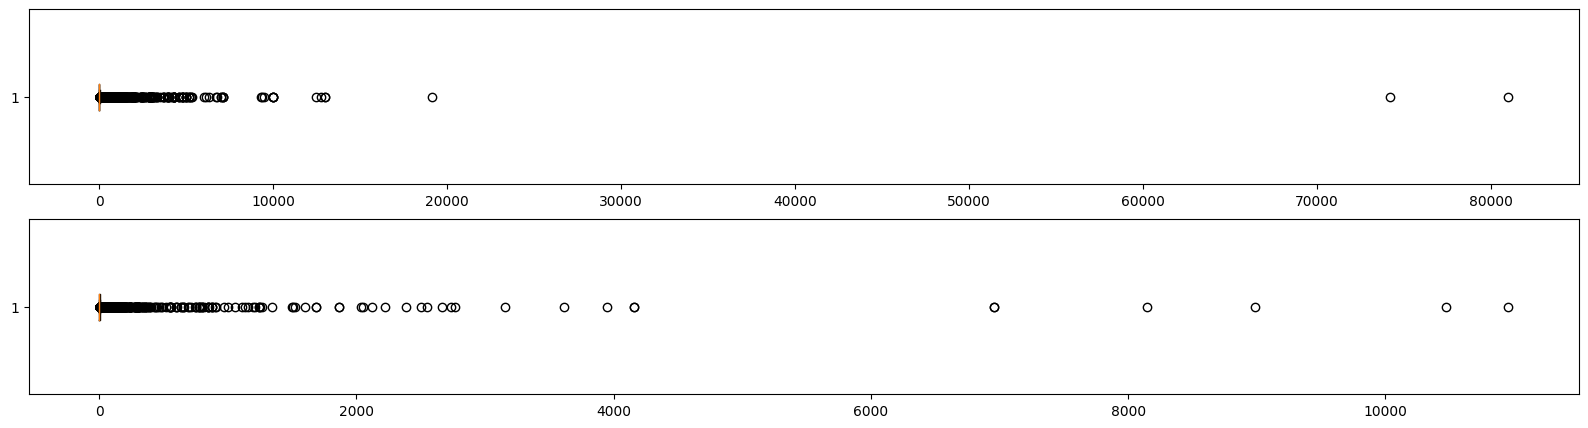

In [69]:
# I observe them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity", "Price"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]], vert = 0)
plt.show()

In [70]:
# I apply the functions for remove the outlier.
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "Price")

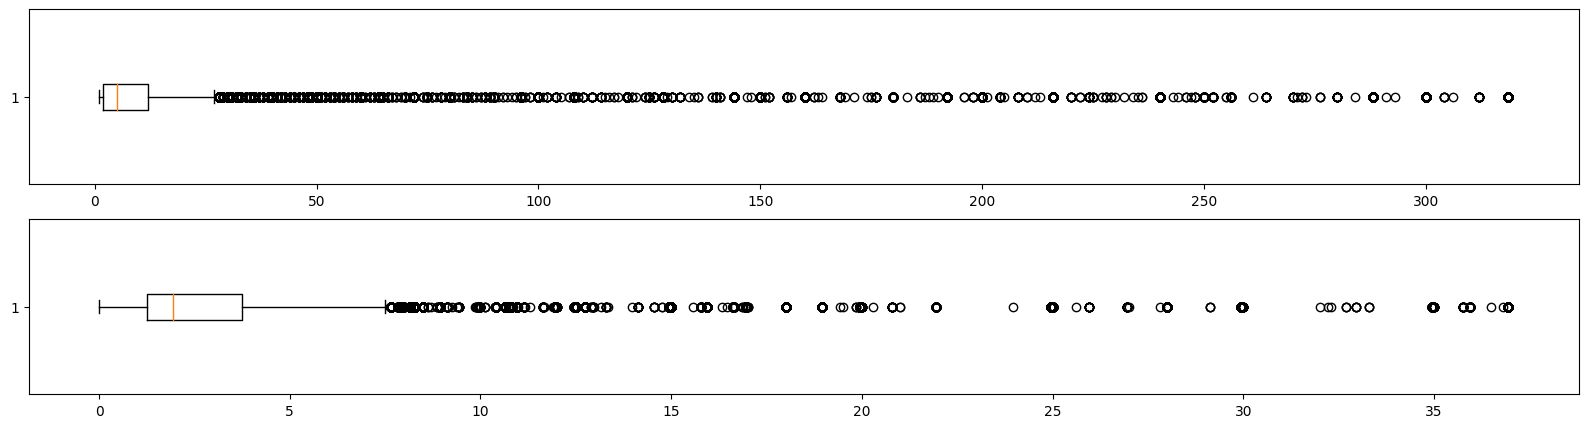

In [71]:
# I observe them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]], vert = 0)
plt.show()

## Prepare CLTV DataFrame <a id="4b"></a>
In this chapter, I am going to prepare the df_cltv dataframe from the first dataset.

In [72]:
# First Dayaset
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS    12.000   
1  489434    79323P                   PINK CHERRY LIGHTS    12.000   
2  489434    79323W                  WHITE CHERRY LIGHTS    12.000   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE     48.000   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX    24.000   

          InvoiceDate  Price  Customer ID         Country  Total_Prize  
0 2009-12-01 07:45:00  6.950    13085.000  United Kingdom       83.400  
1 2009-12-01 07:45:00  6.750    13085.000  United Kingdom       81.000  
2 2009-12-01 07:45:00  6.750    13085.000  United Kingdom       81.000  
3 2009-12-01 07:45:00  2.100    13085.000  United Kingdom      100.800  
4 2009-12-01 07:45:00  1.250    13085.000  United Kingdom       30.000

In [73]:
# It is the last date in the dataset. I will need this to calculate the recency values. I'm going to use this to specify the today_date value.
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

**Recency:** Time since the last purchase. Weekly. (User Specific)<br>
**T:** Customer's age. Weekly. (how long before the analysis date the first purchase was made)<br>
**Frequency:** Total number of repeat purchases (frequency > 1)<br>
**Monetary:** Average earnings per purchase<br>

In [74]:
today_date = dt.datetime(2011, 12, 11)

# Create the df_cltv dataframe.
df_cltv = data.groupby("Customer ID").agg({"InvoiceDate" : [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days, # recency
                                                  lambda InvoiceDate: (today_date - InvoiceDate.min()).days], # T
                                         "Invoice" : lambda Invoice: Invoice.nunique(), # frequnecy
                                         "Total_Prize": lambda Total_Prize: Total_Prize.sum()}) # monatery

In [75]:
# First version of the df_cltv dataframe.
df_cltv.head()

InvoiceDate             Invoice Total_Prize
             <lambda_0> <lambda_1> <lambda>    <lambda>
Customer ID                                            
12346.000           400        726       12   77556.460
12347.000           402        405        8    5633.320
12348.000           362        439        5    2019.400
12349.000           570        590        4    4428.690
12350.000             0        311        1     334.400

In [76]:
# I remove the column names of df_cltv because I am going to change them.
df_cltv.columns = df_cltv.columns.droplevel(0)

In [77]:
df_cltv.head()

<lambda_0>  <lambda_1>  <lambda>  <lambda>
Customer ID                                            
12346.000           400         726        12 77556.460
12347.000           402         405         8  5633.320
12348.000           362         439         5  2019.400
12349.000           570         590         4  4428.690
12350.000             0         311         1   334.400

In [78]:
# I specfy the column name of df_cltv
df_cltv.columns = ["recency", "T", "frequnecy", "monetary"]

In [79]:
df_cltv.head()

recency    T  frequnecy  monetary
Customer ID                                   
12346.000        400  726         12 77556.460
12347.000        402  405          8  5633.320
12348.000        362  439          5  2019.400
12349.000        570  590          4  4428.690
12350.000          0  311          1   334.400

In [80]:
# Average earnings per purchase
df_cltv["monetary"] = df_cltv["monetary"] / df_cltv["frequnecy"]

In [81]:
df_cltv.head()

recency    T  frequnecy  monetary
Customer ID                                   
12346.000        400  726         12  6463.038
12347.000        402  405          8   704.165
12348.000        362  439          5   403.880
12349.000        570  590          4  1107.173
12350.000          0  311          1   334.400

In [82]:
df_cltv = df_cltv[df_cltv["frequnecy"] > 1]

In [83]:
df_cltv.head()

recency    T  frequnecy  monetary
Customer ID                                   
12346.000        400  726         12  6463.038
12347.000        402  405          8   704.165
12348.000        362  439          5   403.880
12349.000        570  590          4  1107.173
12352.000        356  393         10   284.984

In [84]:
# turn the recency and T values to the weekly format
df_cltv["recency"] = df_cltv["recency"] / 7
df_cltv["T"] = df_cltv["T"] / 7

In [85]:
df_cltv.head()

recency       T  frequnecy  monetary
Customer ID                                      
12346.000     57.143 103.714         12  6463.038
12347.000     57.429  57.857          8   704.165
12348.000     51.714  62.714          5   403.880
12349.000     81.429  84.286          4  1107.173
12352.000     50.857  56.143         10   284.984

The dataset is ready for the models.

## BG-NBD <a id= "4c"></a>
In this section, I will apply the BetaGeoFitter model to the df_cltv I created.

In [86]:
# Model
bgf = BetaGeoFitter(penalizer_coef = 0.001)

# fit with frequency, recency, and T values.
bgf.fit(df_cltv["frequnecy"],
       df_cltv["recency"],
       df_cltv["T"])

<lifetimes.BetaGeoFitter: fitted with 4255 subjects, a: 0.24, alpha: 11.24, b: 3.06, r: 1.71>

At the code block below, I calculate how often shop customers in one month with the BetaGeoFitter model.

In [87]:
# Calculating one monthly values
bgf.predict(4, # Bu kısım haftalık cinsten olduğu için 4 yazdım.
           df_cltv["frequnecy"],
           df_cltv["recency"],
           df_cltv["T"]).sort_values(ascending = False).head(10)

Customer ID
14911.000   13.612
12748.000   11.542
17841.000    7.247
15311.000    7.143
13089.000    6.969
14606.000    6.610
14156.000    5.312
14646.000    5.201
18102.000    4.995
13694.000    4.934
dtype: float64

In [88]:
# Calculating three monthly values
bgf.predict(4*3,
           df_cltv["frequnecy"],
           df_cltv["recency"],
           df_cltv["T"]).sort_values(ascending = False).head(10)

Customer ID
14911.000   40.522
12748.000   34.361
17841.000   21.573
15311.000   21.263
13089.000   20.746
14606.000   19.679
14156.000   15.814
14646.000   15.483
18102.000   14.869
13694.000   14.689
dtype: float64

In [89]:
# Adding the three monthly values to the df_cltv
df_cltv["expected_purc_3_month"] = bgf.predict(4*3,
                                               df_cltv["frequnecy"],
                                               df_cltv["recency"],
                                               df_cltv["T"])

In [90]:
df_cltv.head()

recency       T  frequnecy  monetary  expected_purc_3_month
Customer ID                                                             
12346.000     57.143 103.714         12  6463.038                  0.065
12347.000     57.429  57.857          8   704.165                  1.616
12348.000     51.714  62.714          5   403.880                  0.975
12349.000     81.429  84.286          4  1107.173                  0.677
12352.000     50.857  56.143         10   284.984                  1.947

In [91]:
# Calculating six monthly values
bgf.predict(4*6,
           df_cltv["frequnecy"],
           df_cltv["recency"],
           df_cltv["T"]).sort_values(ascending = False).head(10)

Customer ID
14911.000   80.162
12748.000   67.971
17841.000   42.675
15311.000   42.064
13089.000   41.041
14606.000   38.929
14156.000   31.285
14646.000   30.630
18102.000   29.414
13694.000   29.059
dtype: float64

In [92]:
# Adding the six monthly values to the df_cltv
df_cltv["expected_purc_6_month"] = bgf.predict(4*6,
                                               df_cltv["frequnecy"],
                                               df_cltv["recency"],
                                               df_cltv["T"])

In [93]:
df_cltv.head()

recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
12346.000     57.143 103.714         12  6463.038                  0.065   
12347.000     57.429  57.857          8   704.165                  1.616   
12348.000     51.714  62.714          5   403.880                  0.975   
12349.000     81.429  84.286          4  1107.173                  0.677   
12352.000     50.857  56.143         10   284.984                  1.947   

             expected_purc_6_month  
Customer ID                         
12346.000                    0.128  
12347.000                    3.178  
12348.000                    1.920  
12349.000                    1.337  
12352.000                    3.829

## Gamma Gamma <a id="4d"></a>
In this section, I will apply the GammaGammaFitter model to the df_cltv I created.

In [94]:
# Model
ggf = GammaGammaFitter(penalizer_coef = 0.01)

# fitting with frequency adn monetary values
ggf.fit(df_cltv["frequnecy"], df_cltv["monetary"])

<lifetimes.GammaGammaFitter: fitted with 4255 subjects, p: 3.79, q: 0.34, v: 3.73>

At the code block below, I calculate how much profit a customer will bring in with the gammagammafitter model.

In [95]:
ggf.conditional_expected_average_profit(df_cltv["frequnecy"], df_cltv["monetary"]).sort_values(ascending = False).head(10)

Customer ID
16446.000   92282.345
15749.000   15761.990
15098.000   14127.753
15760.000    7624.678
13902.000    7066.182
12346.000    6558.635
12357.000    6473.316
12590.000    5405.163
14091.000    5222.117
12415.000    5191.686
dtype: float64

In [96]:
# Adding the prediction values to df_rfm.
df_cltv["expected_average_profit"] = ggf.conditional_expected_average_profit(df_cltv["frequnecy"], df_cltv["monetary"])

In [97]:
df_cltv.head()

recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
12346.000     57.143 103.714         12  6463.038                  0.065   
12347.000     57.429  57.857          8   704.165                  1.616   
12348.000     51.714  62.714          5   403.880                  0.975   
12349.000     81.429  84.286          4  1107.173                  0.677   
12352.000     50.857  56.143         10   284.984                  1.947   

             expected_purc_6_month  expected_average_profit  
Customer ID                                                  
12346.000                    0.128                 6558.635  
12347.000                    3.178                  720.329  
12348.000                    1.920                  419.245  
12349.000                    1.337                 1158.603  
12352.000                    3.829                  290.421

At the code block below, I calculate the cltv values of the customer.

In [98]:
cltv = ggf.customer_lifetime_value(bgf,
                                  df_cltv["frequnecy"],
                                  df_cltv["recency"],
                                  df_cltv["T"],
                                  df_cltv["monetary"],
                                  time = 6, # six mounth
                                  freq = "W",
                                  discount_rate = 0.01)

In [99]:
cltv.head(10)

Customer ID
12346.000     881.536
12347.000    2396.427
12348.000     842.663
12349.000    1622.932
12352.000    1163.856
12353.000     202.293
12355.000     407.135
12356.000    2734.564
12357.000   10388.550
12358.000    1112.378
Name: clv, dtype: float64

In [100]:
# Adding the cltv values to the df_cltv.
df_cltv["cltv"] = cltv

In [101]:
df_cltv.head()

recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
12346.000     57.143 103.714         12  6463.038                  0.065   
12347.000     57.429  57.857          8   704.165                  1.616   
12348.000     51.714  62.714          5   403.880                  0.975   
12349.000     81.429  84.286          4  1107.173                  0.677   
12352.000     50.857  56.143         10   284.984                  1.947   

             expected_purc_6_month  expected_average_profit     cltv  
Customer ID                                                           
12346.000                    0.128                 6558.635  881.536  
12347.000                    3.178                  720.329 2396.427  
12348.000                    1.920                  419.245  842.663  
12349.000                    1.337                 1158.603 1622.932  
12352.000                    3.829                  290.421 1163.856

## Segmentasyon <a id = "4e"></a>
In this chapter, I split the cltv values into segments.

In [103]:
df_cltv["segment"] = pd.qcut(df_cltv["cltv"], 4, labels = ["D", "C", "B", "A"])

In [104]:
df_cltv.head()

recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
12346.000     57.143 103.714         12  6463.038                  0.065   
12347.000     57.429  57.857          8   704.165                  1.616   
12348.000     51.714  62.714          5   403.880                  0.975   
12349.000     81.429  84.286          4  1107.173                  0.677   
12352.000     50.857  56.143         10   284.984                  1.947   

             expected_purc_6_month  expected_average_profit     cltv segment  
Customer ID                                                                   
12346.000                    0.128                 6558.635  881.536       B  
12347.000                    3.178                  720.329 2396.427       A  
12348.000                    1.920                  419.245  842.663       B  
12349.000                    1.337                 1158.603 1622.932       A  
12352.000                    3.829                  290.421 1163.856       B

## Review The CLTV DataFrame <a id="4f"></a>
In this chapter, I am going to review the df_cltv.

In [105]:
df_cltv.head()

recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
12346.000     57.143 103.714         12  6463.038                  0.065   
12347.000     57.429  57.857          8   704.165                  1.616   
12348.000     51.714  62.714          5   403.880                  0.975   
12349.000     81.429  84.286          4  1107.173                  0.677   
12352.000     50.857  56.143         10   284.984                  1.947   

             expected_purc_6_month  expected_average_profit     cltv segment  
Customer ID                                                                   
12346.000                    0.128                 6558.635  881.536       B  
12347.000                    3.178                  720.329 2396.427       A  
12348.000                    1.920                  419.245  842.663       B  
12349.000                    1.337                 1158.603 1622.932       A  
12352.000                    3.829                  290.421 1163.856       B

At the code below, I check count, mean, and sum value of segments on the other values.

In [106]:
df_cltv.groupby("segment").agg({"count", "mean", "sum"})

recency                      T              frequnecy               \
              sum count   mean       sum count   mean       sum count   mean   
segment                                                                        
D       29798.286  1064 28.006 86915.286  1064 81.687      4212  1064  3.959   
C       63334.286  1064 59.525 80530.857  1064 75.687      4854  1064  4.562   
B       66637.571  1063 62.688 75219.286  1063 70.761      7682  1063  7.227   
A       69490.714  1064 65.311 73941.286  1064 69.494     18598  1064 17.479   

          monetary               expected_purc_3_month              \
               sum count    mean                   sum count  mean   
segment                                                              
D       295041.704  1064 277.295               189.474  1064 0.178   
C       284541.010  1064 267.426               783.565  1064 0.736   
B       382749.999  1063 360.066              1330.903  1063 1.252   
A       772062.045  1064 725.622              2783.605  1064 2.616   

        expected_purc_6_month             expected_average_profit        \
                          sum count  mean                     sum count   
segment                                                                   
D                     373.682  1064 0.351              316223.641  1064   
C                    1541.740  1064 1.449              302191.530  1064   
B                    2613.471  1063 2.459              399491.019  1063   
A                    5464.092  1064 5.135              801215.289  1064   

                       cltv                 
           mean         sum count     mean  
segment                                     
D       297.203   67998.660  1064   63.909  
C       284.015  375643.315  1064  353.048  
B       375.815  851803.800  1063  801.321  
A       753.022 3772717.560  1064 3545.787

In [107]:
df_cltv.sort_values(by = "recency", ascending = False).head()

recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
15311.000    105.429 105.571        208   561.400                 21.263   
18102.000    105.429 105.571        145  4198.770                 14.869   
14911.000    105.286 105.571        398   743.650                 40.522   
13599.000    105.286 105.571         33   308.110                  3.500   
13777.000    105.286 105.429         61   925.876                  6.350   

             expected_purc_6_month  expected_average_profit       cltv segment  
Customer ID                                                                     
15311.000                   42.064                  561.889  24759.300       A  
18102.000                   29.414                 4203.850 129534.735       A  
14911.000                   80.162                  743.985  62475.809       A  
13599.000                    6.924                  309.860   2247.507       A  
13777.000                   12.563                  928.591  12220.823       A

In [108]:
def check_cltv_best_and_worst(column):
    print(f"############ Top five - {column} ############")
    print(df_cltv.sort_values(by = column, ascending = False).head())
    print(f"############ Bottom five - {column} ############")
    print(df_cltv.sort_values(by = column, ascending = True).head())

In [109]:
check_cltv_best_and_worst("recency")

############ Top five - recency ############
             recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
15311.000    105.429 105.571        208   561.400                 21.263   
18102.000    105.429 105.571        145  4198.770                 14.869   
14911.000    105.286 105.571        398   743.650                 40.522   
13599.000    105.286 105.571         33   308.110                  3.500   
13777.000    105.286 105.429         61   925.876                  6.350   

             expected_purc_6_month  expected_average_profit       cltv segment  
Customer ID                                                                     
15311.000                   42.064                  561.889  24759.300       A  
18102.000                   29.414                 4203.850 129534.735       A  
14911.000                   80.162                  743.985  62475.809       A  
13599.000        

In [110]:
check_cltv_best_and_worst("frequnecy")

############ Top five - frequnecy ############
             recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
14911.000    105.286 105.571        398   743.650                 40.522   
12748.000    104.857 105.143        336   168.451                 34.361   
17841.000    105.000 105.429        211   335.943                 21.573   
15311.000    105.429 105.571        208   561.400                 21.263   
13089.000    104.857 105.429        203   575.063                 20.746   

             expected_purc_6_month  expected_average_profit      cltv segment  
Customer ID                                                                    
14911.000                   80.162                  743.985 62475.809       A  
12748.000                   67.971                  168.549 12001.151       A  
17841.000                   42.675                  336.239 15031.508       A  
15311.000           

In [111]:
check_cltv_best_and_worst("monetary")

############ Top five - monetary ############
             recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
16446.000     29.143  29.429          2 84236.250                  1.005   
15749.000     13.857  47.571          3 14844.767                  0.263   
15098.000      0.000  26.143          3 13305.500                  0.101   
15760.000      0.000  90.143          2  6958.170                  0.002   
13902.000     13.143 103.571          5  6819.052                  0.001   

             expected_purc_6_month  expected_average_profit       cltv segment  
Customer ID                                                                     
16446.000                    1.961                92282.345 189262.883       A  
15749.000                    0.517                15761.990   8520.919       A  
15098.000                    0.198                14127.753   2919.211       A  
15760.000       

In [112]:
df_cltv.head()

recency       T  frequnecy  monetary  expected_purc_3_month  \
Customer ID                                                                
12346.000     57.143 103.714         12  6463.038                  0.065   
12347.000     57.429  57.857          8   704.165                  1.616   
12348.000     51.714  62.714          5   403.880                  0.975   
12349.000     81.429  84.286          4  1107.173                  0.677   
12352.000     50.857  56.143         10   284.984                  1.947   

             expected_purc_6_month  expected_average_profit     cltv segment  
Customer ID                                                                   
12346.000                    0.128                 6558.635  881.536       B  
12347.000                    3.178                  720.329 2396.427       A  
12348.000                    1.920                  419.245  842.663       B  
12349.000                    1.337                 1158.603 1622.932       A  
12352.000                    3.829                  290.421 1163.856       B

In [113]:
# Correlation between the columns.
df_cltv.corr()

ValueError: could not convert string to float: 'B'

At the code block below, I visualize the correlation between the df_cltv columns.

ValueError: could not convert string to float: 'B'

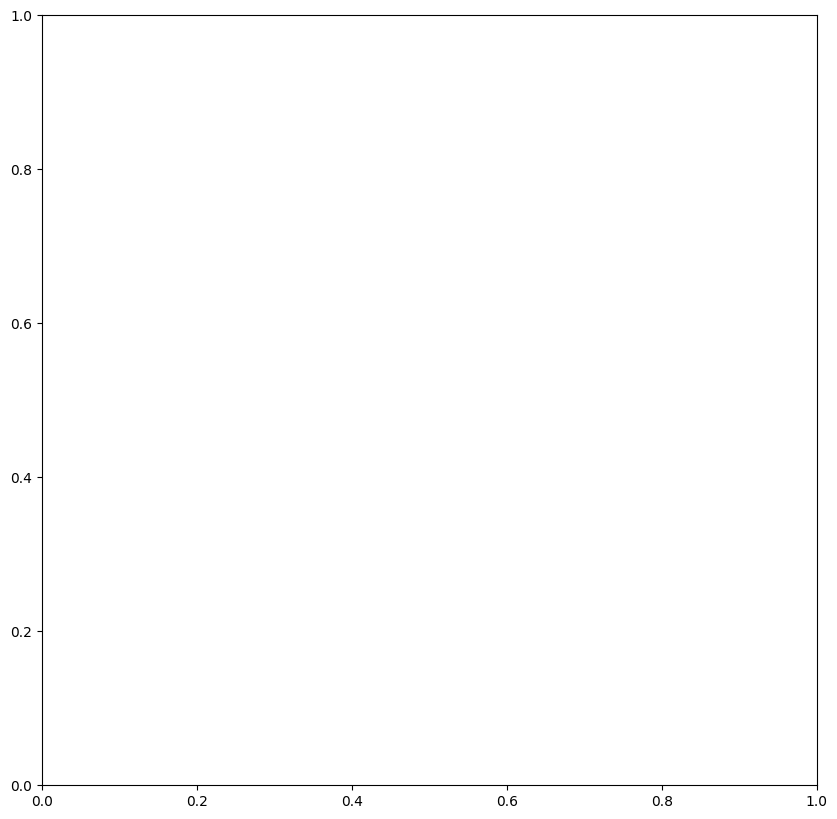

In [114]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_cltv.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

At the code block below, I visualize the distributions of the segments in the df_cltv datafrem.

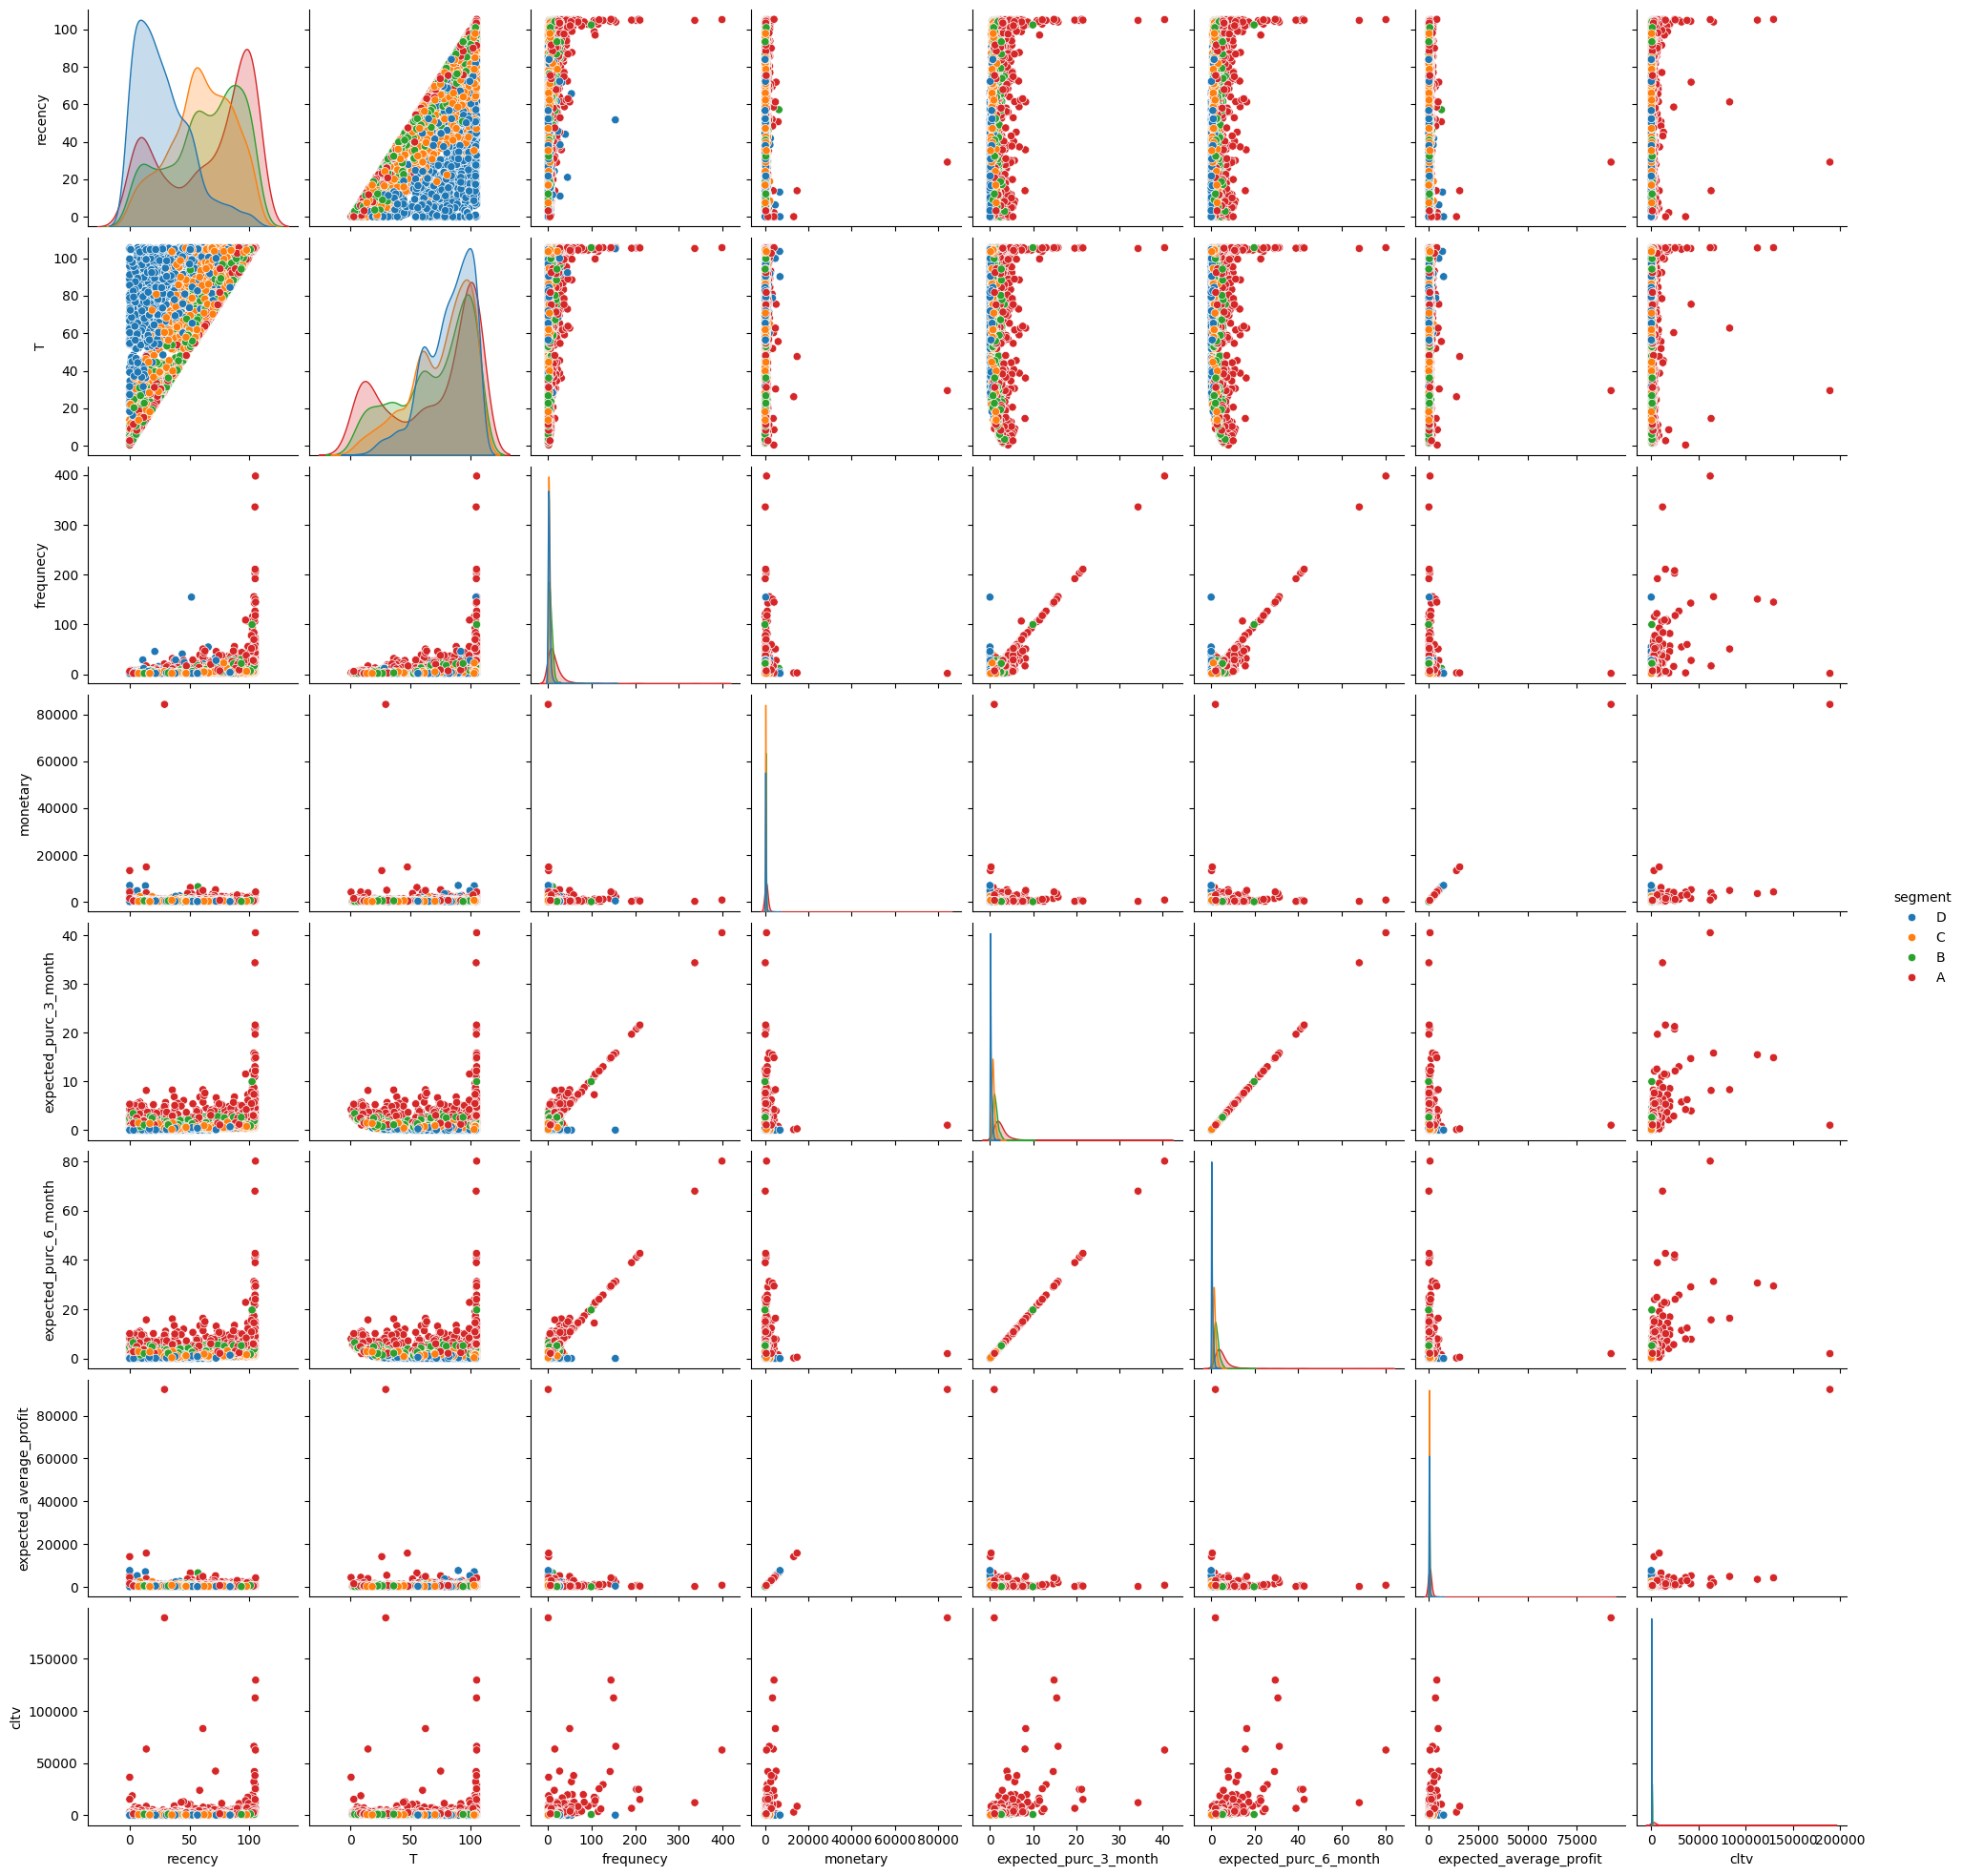

In [115]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(df_cltv, hue = "segment")

# Conclusion <a id = "5"></a>
[Go Content](#cont) <br>
Again Hello, We are end of my work. I tried to reflect on my information on CRM Analytics on the dataset. I hope you have liked my work. If I had a mistake please warn me in the comments. At the same time, I would be very happy if you could help me in the comments, whether it is CRM analytics or any other subject that I can add to my knowledge.

<div style="width:100%;text-align: center;"> <img align=middle src="https://64.media.tumblr.com/90f0854253f2afd0c77d834046a0d6a4/tumblr_inline_nwc278RVQE1sgzopb_640.gif" alt="Heat beating" style="height:300px;margin-top:1rem;margin-bottom:1rem;"> </div>
